# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Adult Income Prediction Project Solution</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to get informed of the most recent updates, then don't forget to follow us on:</b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# <font color='green'> <b>Exploratory Data Analysis</b><font color='black'>

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.

**Attribute Information:**

**Age**: Describes the age of individuals. Continuous.

**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt**: Continuous value. This is a weighting factor created by the U.S. Census Bureau, indicating the number of people that each data entry represents. For example, if the fnlwgt value for a data entry is 100, it means that this data entry is considered to represent 100 people.

However, this feature is not typically used directly in analyses or model training because these weights don't have a direct significance on individual data points when training or testing models. Nonetheless, these weight values can be useful if a more in-depth demographic analysis of the dataset is being conducted.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: Number of years spent in education. Continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: Represents the profit an individual makes from the sale of assets (e.g., stock or real estate sales). Continuous.

**capital-loss**: Represents the loss an individual incurs from the sale of assets (e.g., stock or real estate sales). Continuous.

**hours-per-week**: Continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary**: >50K,<=50K.


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
sns.set_theme(style='white', context='notebook', palette='deep')

# Import scikit_learn module for the algorithm/model: Linear Regression
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
data = pd.read_csv('adult.csv')
df = data.copy()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# <font color='green'> <b>Data Pre-Processing</b><font color='black'>

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,32561,42,United-States,29170
income,32561,2,<=50K,24720


In [10]:
df.sex.value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

In [11]:
df.income.value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Note: Unbalanced dataset

In [13]:
#Reformatting the target columns. Salary less than and equal to 50K will be assigned 0 and salary greater than 50K will be assigned 1.
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})
df.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0


In [14]:
df.income.value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

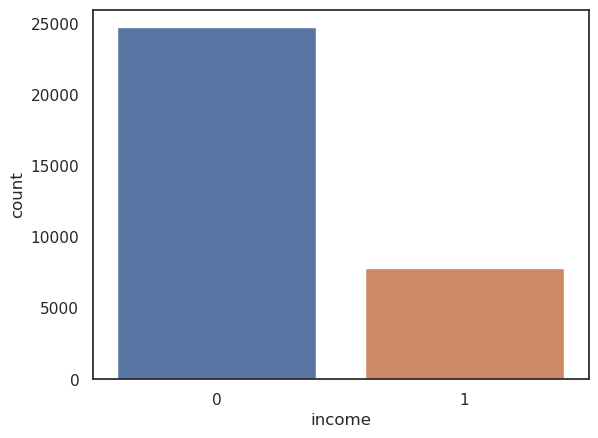

In [15]:
sns.countplot(x="income", data=df)

We have 24720 people with income below 50k and 7841 with income above 50k

In [16]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

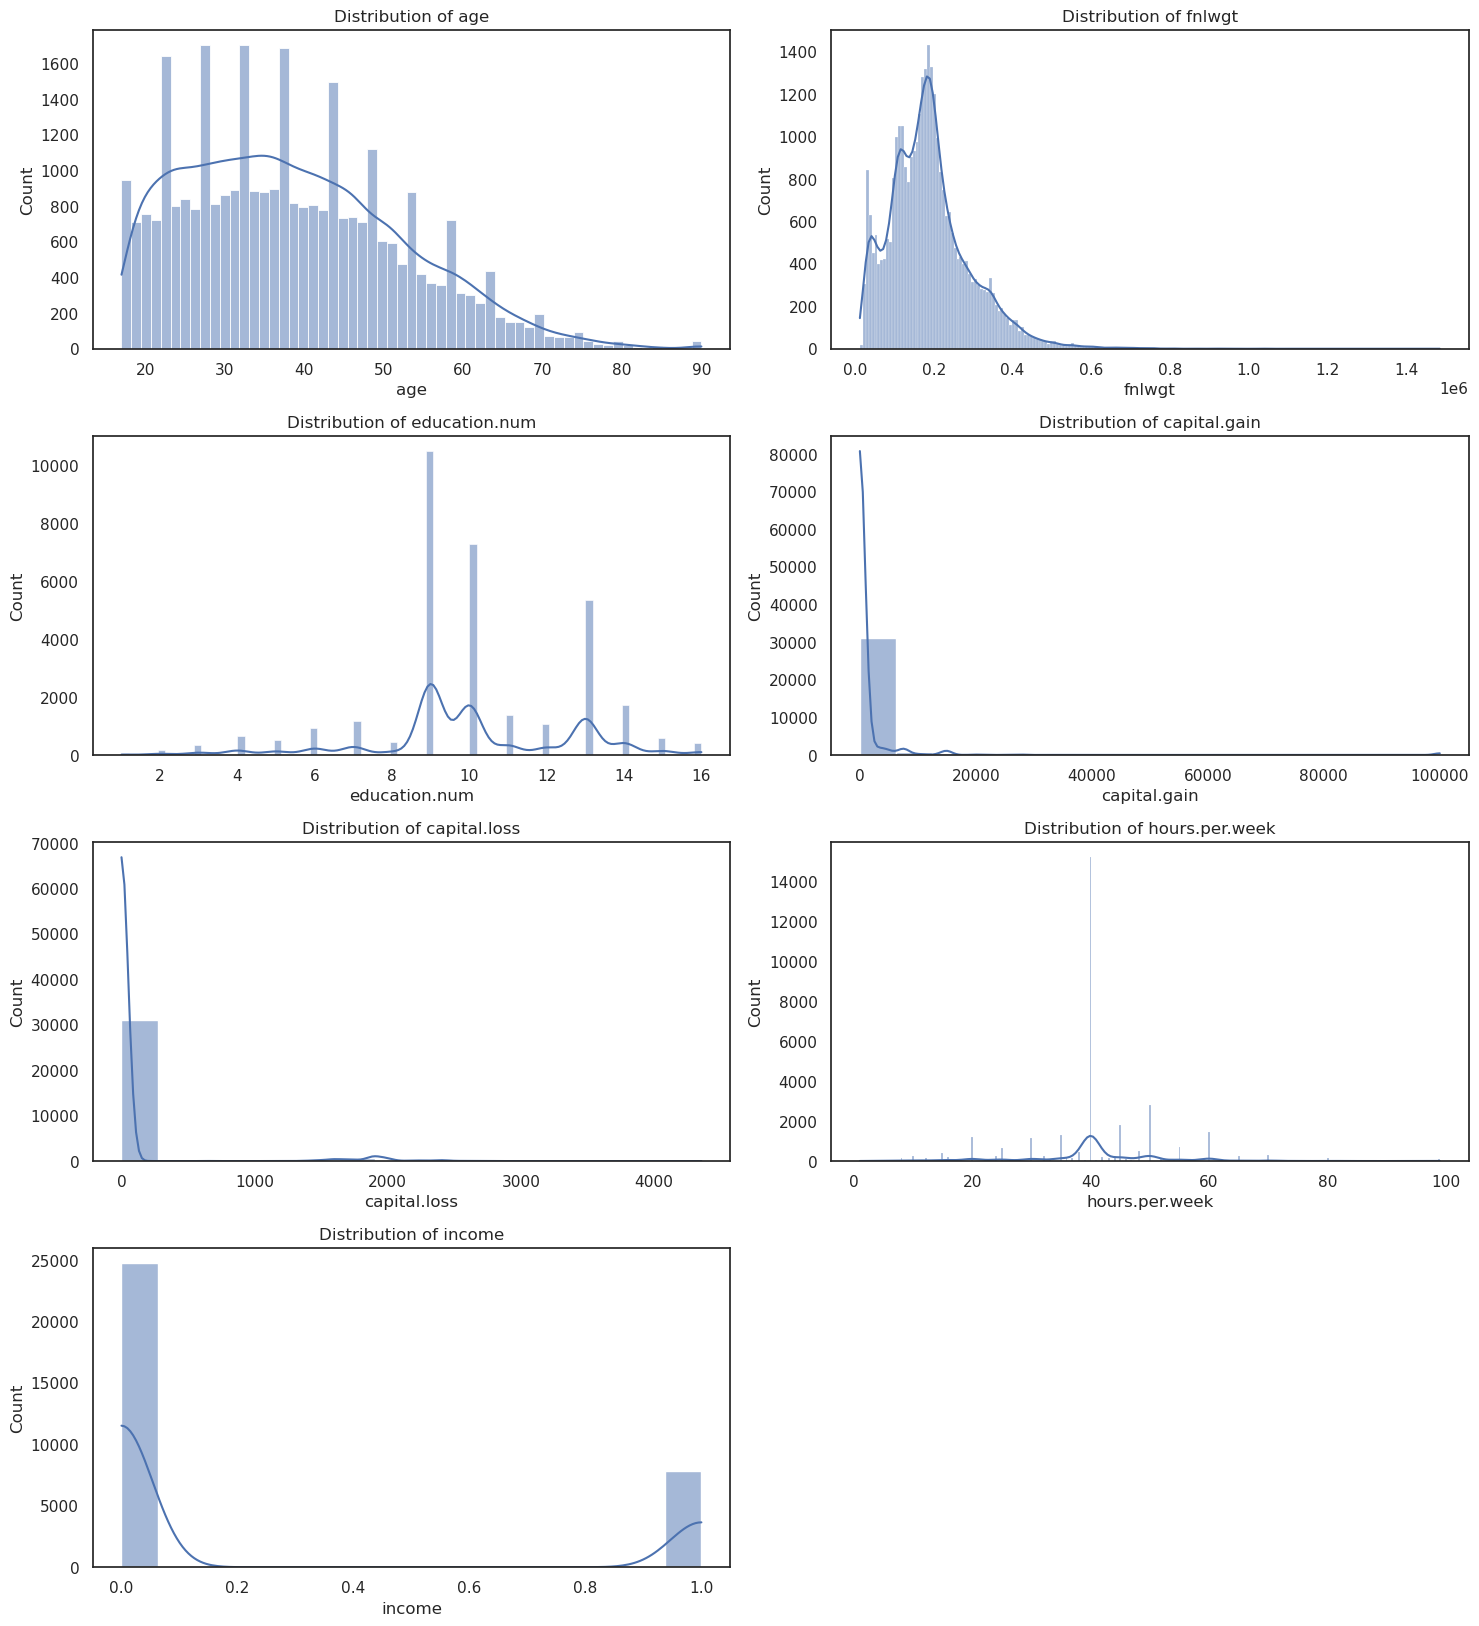

In [20]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 20))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

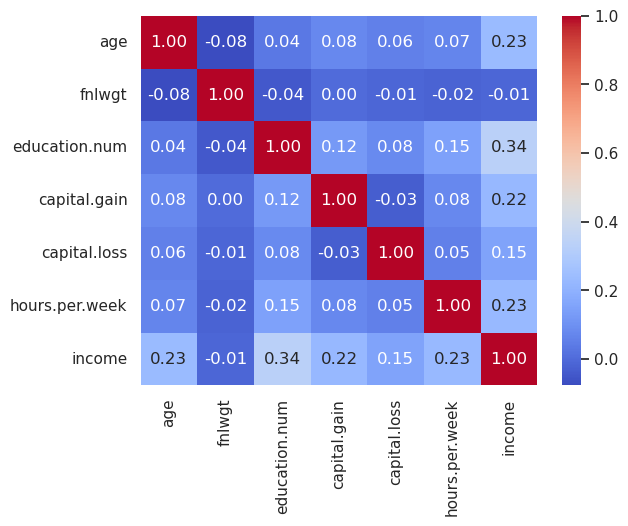

In [21]:
cor_mat = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

education.num, age, hours.per.week, capital.loss have higher correlation with income. No significant correlation among independent variables are observed, so multicollinearity is not observed.

In [22]:
#Finding the special characters in the data frame 
df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

## Feature engineering

In [23]:
# code will replace the special character to nan and then drop the columns 
df['native.country'] = df['native.country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [25]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [26]:
df.shape

(32561, 15)

In [33]:
df.dropna(how='any',inplace=True)

In [34]:
df.shape

(30162, 15)

In [35]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [36]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income             int64
dtype: object

In [38]:
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [39]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


# <font color='green'> <b>Implement Logistic Regression</b><font color='black'>

In [45]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8178352395159953
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4533
           1       0.72      0.44      0.55      1500

    accuracy                           0.82      6033
   macro avg       0.78      0.69      0.72      6033
weighted avg       0.81      0.82      0.80      6033

Confusion Matrix:
 [[4274  259]
 [ 840  660]]


### Logistics Regression Model Evaluation and Interpretation

#### 1. **Accuracy**: 
- The model achieved an **accuracy of 81.78%**, meaning that 81.78% of the predictions made were correct.
- Accuracy alone might not fully capture the model's performance due to the potential imbalance in the target classes (income <= 50K vs. income > 50K).

#### 2. **Classification Report**:
- The classification report breaks down the performance for both income classes:
  - **Class 0 (Income <= 50K)**:
    - **Precision**: 0.84 (84% of predictions for income <= 50K were correct).
    - **Recall**: 0.94 (94% of people with income <= 50K were correctly identified).
    - **F1-Score**: 0.89 (good balance between precision and recall).
  - **Class 1 (Income > 50K)**:
    - **Precision**: 0.72 (72% of predictions for income > 50K were correct).
    - **Recall**: 0.44 (only 44% of people with income > 50K were correctly identified).
    - **F1-Score**: 0.55 (indicating weaker performance for classifying individuals with higher income).

#### 3. **Confusion Matrix**:
- The confusion matrix shows the breakdown of correct and incorrect classifications:
  - **True Negatives (4274)**: Individuals correctly classified as having income <= 50K.
  - **False Positives (259)**: Individuals incorrectly classified as having income > 50K.
  - **True Positives (660)**: Individuals correctly classified as having income > 50K.
  - **False Negatives (840)**: Individuals incorrectly classified as having income <= 50K.

#### 4. **Key Observations**:
- The model performs well for **Class 0 (Income <= 50K)**, achieving high precision, recall, and f1-score.
- For **Class 1 (Income > 50K)**, the model struggles with a low recall (0.44), meaning many high-income individuals are misclassified as having lower income.
- Improving the recall for Class 1 could involve addressing class imbalance, tuning hyperparameters, or using a more complex model.


# <font color='green'> <b>K Nearest Neigbors (KNN)</b><font color='black'>

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the K-Nearest Neighbors (KNN) model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8224763799104923
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4533
           1       0.66      0.58      0.62      1500

    accuracy                           0.82      6033
   macro avg       0.77      0.74      0.75      6033
weighted avg       0.82      0.82      0.82      6033

Confusion Matrix:
 [[4093  440]
 [ 631  869]]


### K-Nearest Neighbors Model Evaluation

#### 1. **Accuracy**: 
- The model achieved an **accuracy of 82.25%**, meaning that 82.25% of the predictions made by the KNN classifier were correct.

#### 2. **Classification Report**:
- The classification report breaks down the performance for both income classes:
  - **Class 0 (Income <= 50K)**:
    - **Precision**: 0.87 (87% of individuals predicted to have income <= 50K were correctly classified).
    - **Recall**: 0.90 (90% of individuals actually having income <= 50K were correctly identified).
    - **F1-Score**: 0.88 (good balance between precision and recall).
  - **Class 1 (Income > 50K)**:
    - **Precision**: 0.66 (66% of individuals predicted to have income > 50K were correctly classified).
    - **Recall**: 0.58 (58% of individuals actually having income > 50K were correctly identified).
    - **F1-Score**: 0.62 (moderate performance for predicting individuals with income > 50K).

- **Macro Avg** (Average across classes):
  - **Precision**: 0.77
  - **Recall**: 0.74
  - **F1-Score**: 0.75

- **Weighted Avg** (Weighted by class support):
  - **Precision**: 0.82
  - **Recall**: 0.82
  - **F1-Score**: 0.82

#### 3. **Confusion Matrix**:
- The confusion matrix provides a summary of correct and incorrect classifications:
  - **True Negatives (4093)**: Individuals correctly classified as having income <= 50K.
  - **False Positives (440)**: Individuals incorrectly classified as having income > 50K, but their actual income is <= 50K.
  - **True Positives (869)**: Individuals correctly classified as having income > 50K.
  - **False Negatives (631)**: Individuals incorrectly classified as having income <= 50K, but their actual income is > 50K.

#### 4. **Key Observations**:
- The model performs well for **Class 0 (Income <= 50K)**, with high precision (0.87) and recall (0.90).
- For **Class 1 (Income > 50K)**, the model has lower recall (0.58), meaning it struggles to identify individuals with higher income accurately.
- The **F1-score for Class 1** is relatively lower, indicating room for improvement in predicting individuals with income > 50K.
- Overall, the model achieves good accuracy but could benefit from tuning to improve recall for the high-income class.


# <font color='green'> <b>Implement Support Vector Machine (SVC)</b><font color='black'>

In [48]:
from sklearn.svm import SVC

In [49]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Support Vector Classifier (SVC) model
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8042433283606829
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4533
           1       0.77      0.30      0.44      1500

    accuracy                           0.80      6033
   macro avg       0.79      0.64      0.66      6033
weighted avg       0.80      0.80      0.77      6033

Confusion Matrix:
 [[4395  138]
 [1043  457]]


### Support Vector Machine (SVC) Model Evaluation

#### 1. **Accuracy**:
- The model achieved an overall accuracy of **80.42%**, indicating that 80.42% of the predictions made by the SVM classifier were correct.

#### 2. **Classification Report**:
- The classification report provides a detailed performance breakdown for both income classes:
  
  - **Class 0 (Income <= 50K)**:
    - **Precision**: 0.81 (81% of individuals predicted to have income <= 50K were correctly classified).
    - **Recall**: 0.97 (97% of individuals actually having income <= 50K were correctly identified).
    - **F1-Score**: 0.88 (a good balance between precision and recall, indicating strong performance in predicting low-income individuals).

  - **Class 1 (Income > 50K)**:
    - **Precision**: 0.77 (77% of individuals predicted to have income > 50K were correctly classified).
    - **Recall**: 0.30 (Only 30% of individuals actually having income > 50K were correctly identified).
    - **F1-Score**: 0.44 (indicating a weaker performance for predicting high-income individuals).

- **Macro Avg** (Unweighted average across classes):
  - **Precision**: 0.79
  - **Recall**: 0.64
  - **F1-Score**: 0.66

- **Weighted Avg** (Weighted by class support):
  - **Precision**: 0.80
  - **Recall**: 0.80
  - **F1-Score**: 0.77

#### 3. **Confusion Matrix**:
- The confusion matrix shows:
  - **True Negatives (4395)**: Individuals correctly classified as having income <= 50K.
  - **False Positives (138)**: Individuals incorrectly classified as having income > 50K, but their actual income is <= 50K.
  - **True Positives (457)**: Individuals correctly classified as having income > 50K.
  - **False Negatives (1043)**: Individuals incorrectly classified as having income <= 50K, but their actual income is > 50K.

#### 4. **Key Observations**:
- The model performs **very well** for **Class 0 (Income <= 50K)**, with high recall (0.97) and a strong F1-score (0.88).
- The model struggles with **Class 1 (Income > 50K)**, with a low recall (0.30), meaning many high-income individuals are being misclassified as low-income.
- While the overall accuracy is decent at **80.42%**, the imbalance between the performance on Class 0 and Class 1 suggests that the model may need further tuning, particularly to improve recall for high-income individuals.


# <font color='green'> <b>Conclusion</b><font color='black'>

### Comparison of Models: Logistic Regression, K-Nearest Neighbors, and Support Vector Machine

| Model                | Accuracy | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|----------------------|----------|---------------------|------------------|--------------------|---------------------|------------------|--------------------|
| **Logistic Regression** | 0.8178   | 0.84                | 0.94             | 0.89               | 0.72                | 0.44             | 0.55               |
| **K-Nearest Neighbors** | 0.8225   | 0.87                | 0.90             | 0.88               | 0.66                | 0.58             | 0.62               |
| **Support Vector Machine** | 0.8042   | 0.81                | 0.97             | 0.88               | 0.77                | 0.30             | 0.44               |

#### 1. **Accuracy**:
- **K-Nearest Neighbors** (KNN) performed best with an accuracy of **82.25%**.
- **Logistic Regression** achieved an accuracy of **81.78%**.
- **Support Vector Machine** (SVM) performed slightly lower at **80.42%**.

#### 2. **Performance on Class 0 (Income <= 50K)**:
- **KNN** and **SVM** both had high recall for Class 0 (90% and 97%, respectively), meaning they correctly identified most of the low-income individuals.
- **Precision** was highest for **KNN** at **0.87**, meaning fewer low-income individuals were misclassified as high-income.

#### 3. **Performance on Class 1 (Income > 50K)**:
- **Logistic Regression** performed relatively better for **Class 1** in terms of precision (**0.72**) and had a moderate F1-score (**0.55**).
- **KNN** showed a balanced performance with **precision of 0.66** and **recall of 0.58**, leading to the highest F1-score (**0.62**) for Class 1.
- **SVM** had the lowest recall for Class 1 (**0.30**), indicating a struggle to identify high-income individuals accurately.

#### 4. **Model Strengths**:
- **Logistic Regression**: Performed well on high-income predictions but had slightly lower recall and F1-score for Class 1.
- **K-Nearest Neighbors**: Showed balanced performance across both classes with the highest F1-score for Class 1, making it a good choice for balanced classification.
- **Support Vector Machine**: Excelled in identifying low-income individuals (Class 0), but struggled significantly with high-income predictions (Class 1), leading to low recall for that class.

### Suggestions:
- **KNN** appears to be the most balanced model overall, offering high accuracy and good performance on both classes. It is recommended if equal emphasis is needed for both income classes.
- **Logistic Regression** could be a good choice if the primary focus is on **Class 1** (high-income individuals), as it offers a better trade-off between precision and recall in that class compared to SVM.
- **SVM** requires further tuning, especially for **Class 1**, potentially experimenting with different kernels (e.g., RBF) or hyperparameters (like regularization) to improve performance on high-income individuals.
- **Further Improvements**:
  - Consider **resampling techniques** (e.g., SMOTE) to balance the classes and improve recall for Class 1.
  - **Hyperparameter tuning** using techniques like grid search or random search could further improve the performance of all models.
  - **Ensemble methods** (like Random Forest or Gradient Boosting) could provide a more robust solution by combining the strengths of different models.


# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Thanks and Hoping it will be usefull</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to get informed of the most recent updates, then don't forget to follow us on</b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |